# Topic Modelling 
modified with 
*  https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html
* https://towardsdatascience.com/6-tips-to-optimize-an-nlp-topic-model-for-interpretability-20742f3047e2

In [29]:
#visualisation 
!pip install pyldavis --q

## Import Modules




In [1]:
from pprint import pprint 

#logging 
import logging 
logging.basicConfig(format = '%(asctime)s: %(levelname)s : %(message)s',level= logging.INFO)

In [2]:
#pre-process data
import pandas as pd
import numpy as np

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
from gensim.parsing.preprocessing import strip_numeric,strip_multiple_whitespaces, strip_punctuation, strip_short, strip_tags

2021-07-29 11:44:17,364: INFO : 'pattern' package not found; tag filters are not available for English


In [3]:
#form ngrams
from gensim.models import Phrases
from gensim.corpora import Dictionary 
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
#LDA Model
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

#tfidf model 
from gensim.models import TfidfModel

In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('drive/MyDrive/bbc_1807_1906_novideos.csv',encoding = 'utf-8')
df.head()

,Month,link,text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1901,https://www.bbc.co.uk/news/health-46638419,My name is Tim and I'm a cheese addict. But wh...,NaN,NaN,NaN,NaN
1,1901,https://www.bbc.co.uk/news/health-46720303,Children in the UK exceed the maximum recommen...,NaN,NaN,NaN,NaN
2,1901,https://www.bbc.co.uk/news/health-46746552,A clinical trial has been launched to see if a...,NaN,NaN,NaN,NaN
3,1901,https://www.bbc.co.uk/news/health-46739905,When 12-year-old Matthew Carter saw how much s...,NaN,NaN,NaN,NaN
4,1901,https://www.bbc.co.uk/news/stories-46427960,When Jessica Share bought sperm from a sperm b...,NaN,NaN,NaN,NaN


In [12]:
texts = list(df.loc[:, "text"].values)
texts[0]

'My name is Tim and I\'m a cheese addict. But what I\'ve been discovering recently has shaken me to the core. I can barely look a Babybel in the face. A half-eaten halloumi squeaklessly lies yellowing in the fridge. My cheese dreams are shattering. For, after a lifetime of unfettered devotion, could it possibly be that cheese is more foe than friend? That I am addicted to something that is not so good for my body? That cheese should be toast? These are questions that began surfacing a couple of months ago when I began making an episode for my new podcast for the BBC, All Hail Kale, looking into whether dairy was scary.  For some time, I\'d increasingly been questioning the logic of adults drinking milk.  While milk and dairy products, such as cheese and yoghurt, are good sources of protein and calcium and can form part of a healthy, balanced diet, as Dr Michael Greger, from NutritionFacts.org, put it to me: "There\'s no animal on the planet that drinks milk after weaning - and then to 

### Pre-process, tokenise, and lemmatisation

In [10]:
# new_sw = ['people','say','says','said','could','one','would']
# stop_words = STOPWORDS.union(set(new_sw))

In [13]:
clean_article = []

for text in texts:
  #remove new line character and punctuations 
  clean = []
  text = strip_multiple_whitespaces(text)
  text = strip_numeric(text)
  text = strip_punctuation(text)
  text = strip_tags(text)
  text = strip_short(text,minsize=3)
  text = remove_stopwords(text)
  # lower case, de-accents.  Convert the texts into a list of tokens
  for token in gensim.utils.simple_preprocess(text, deacc=True):
      clean.append(token)
  clean_article.append(clean)

In [14]:
cleaned_texts = np.array(clean_article)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [15]:
print(cleaned_texts.shape)

(712,)


In [16]:
print(cleaned_texts[0:2])

[list(['tim', 'cheese', 'addict', 'but', 'discovering', 'recently', 'shaken', 'core', 'barely', 'look', 'babybel', 'face', 'half', 'eaten', 'halloumi', 'squeaklessly', 'lies', 'yellowing', 'fridge', 'cheese', 'dreams', 'shattering', 'for', 'lifetime', 'unfettered', 'devotion', 'possibly', 'cheese', 'foe', 'friend', 'that', 'addicted', 'good', 'body', 'that', 'cheese', 'toast', 'these', 'questions', 'began', 'surfacing', 'couple', 'months', 'ago', 'began', 'making', 'episode', 'new', 'podcast', 'bbc', 'all', 'hail', 'kale', 'looking', 'dairy', 'scary', 'for', 'time', 'increasingly', 'questioning', 'logic', 'adults', 'drinking', 'milk', 'while', 'milk', 'dairy', 'products', 'cheese', 'yoghurt', 'good', 'sources', 'protein', 'calcium', 'form', 'healthy', 'balanced', 'diet', 'michael', 'greger', 'nutritionfacts', 'org', 'there', 'animal', 'planet', 'drinks', 'milk', 'weaning', 'drink', 'milk', 'species', 'sense', 'reeled', 'series', 'studies', 'showing', 'life', 'shortening', 'potential', 

In [17]:
# WORDNET LEMMATIZER (with appropriate pos tags)
  
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [18]:
lemmatizer = WordNetLemmatizer()
  
# Define function to lemmatize each word with its POS tag
  
# POS_TAGGER_FUNCTION : TYPE 1
def pos_tagger(tagged_list):
  tag_list = []
  for (word,tag) in tagged_list:
    if tag.startswith('J'):
        tag_list.append((word, wordnet.ADJ))
    elif tag.startswith('V'):
        tag_list.append((word, wordnet.VERB))
    elif tag.startswith('N'):
        tag_list.append((word, wordnet.NOUN))
    elif tag.startswith('R'):
        tag_list.append((word, wordnet.ADV))
    else:          
        tag_list.append((word, None))
  return tag_list

In [19]:
pos_list=[]
for article in cleaned_texts:
  pos_article = []
  for token in article:
    pos_article.extend(nltk.pos_tag(nltk.word_tokenize(token)))
  pos_list.append(pos_article)  

In [20]:
print(pos_list[0])

[('tim', 'NN'), ('cheese', 'NN'), ('addict', 'NN'), ('but', 'CC'), ('discovering', 'VBG'), ('recently', 'RB'), ('shaken', 'NNS'), ('core', 'NN'), ('barely', 'RB'), ('look', 'NN'), ('babybel', 'NN'), ('face', 'NN'), ('half', 'NN'), ('eaten', 'VB'), ('halloumi', 'NN'), ('squeaklessly', 'RB'), ('lies', 'NNS'), ('yellowing', 'VBG'), ('fridge', 'NN'), ('cheese', 'NN'), ('dreams', 'NNS'), ('shattering', 'VBG'), ('for', 'IN'), ('lifetime', 'NN'), ('unfettered', 'JJ'), ('devotion', 'NN'), ('possibly', 'RB'), ('cheese', 'NN'), ('foe', 'NN'), ('friend', 'NN'), ('that', 'IN'), ('addicted', 'VBN'), ('good', 'JJ'), ('body', 'NN'), ('that', 'IN'), ('cheese', 'NN'), ('toast', 'NN'), ('these', 'DT'), ('questions', 'NNS'), ('began', 'VBD'), ('surfacing', 'VBG'), ('couple', 'NN'), ('months', 'NNS'), ('ago', 'RB'), ('began', 'VBD'), ('making', 'VBG'), ('episode', 'NN'), ('new', 'JJ'), ('podcast', 'NN'), ('bbc', 'NN'), ('all', 'DT'), ('hail', 'NN'), ('kale', 'NN'), ('looking', 'VBG'), ('dairy', 'NN'), ('s

In [21]:
lem_list = []
for article in pos_list:
  new_list = pos_tagger(article)
  lem_list.append(new_list)

In [22]:
print(lem_list[0])

[('tim', 'n'), ('cheese', 'n'), ('addict', 'n'), ('but', None), ('discovering', 'v'), ('recently', 'r'), ('shaken', 'n'), ('core', 'n'), ('barely', 'r'), ('look', 'n'), ('babybel', 'n'), ('face', 'n'), ('half', 'n'), ('eaten', 'v'), ('halloumi', 'n'), ('squeaklessly', 'r'), ('lies', 'n'), ('yellowing', 'v'), ('fridge', 'n'), ('cheese', 'n'), ('dreams', 'n'), ('shattering', 'v'), ('for', None), ('lifetime', 'n'), ('unfettered', 'a'), ('devotion', 'n'), ('possibly', 'r'), ('cheese', 'n'), ('foe', 'n'), ('friend', 'n'), ('that', None), ('addicted', 'v'), ('good', 'a'), ('body', 'n'), ('that', None), ('cheese', 'n'), ('toast', 'n'), ('these', None), ('questions', 'n'), ('began', 'v'), ('surfacing', 'v'), ('couple', 'n'), ('months', 'n'), ('ago', 'r'), ('began', 'v'), ('making', 'v'), ('episode', 'n'), ('new', 'a'), ('podcast', 'n'), ('bbc', 'n'), ('all', None), ('hail', 'n'), ('kale', 'n'), ('looking', 'v'), ('dairy', 'n'), ('scary', 'a'), ('for', None), ('time', 'n'), ('increasingly', 'r'

In [23]:
lemmatized_list = []
for article in lem_list:
  lemmatized_article = []
  for (word, tag)in article:
    if tag is None:
        # if there is no available tag, append the token as is
        lemmatized_article.append(word)
    else:        
        # else use the tag to lemmatize the token
        lemmatized_article.append(lemmatizer.lemmatize(word,tag))
  lemmatized_list.append(lemmatized_article)

In [24]:
print(lemmatized_list[0])
print(lemmatized_list[1])

['tim', 'cheese', 'addict', 'but', 'discover', 'recently', 'shaken', 'core', 'barely', 'look', 'babybel', 'face', 'half', 'eat', 'halloumi', 'squeaklessly', 'lie', 'yellow', 'fridge', 'cheese', 'dream', 'shatter', 'for', 'lifetime', 'unfettered', 'devotion', 'possibly', 'cheese', 'foe', 'friend', 'that', 'addict', 'good', 'body', 'that', 'cheese', 'toast', 'these', 'question', 'begin', 'surface', 'couple', 'month', 'ago', 'begin', 'make', 'episode', 'new', 'podcast', 'bbc', 'all', 'hail', 'kale', 'look', 'dairy', 'scary', 'for', 'time', 'increasingly', 'question', 'logic', 'adult', 'drinking', 'milk', 'while', 'milk', 'dairy', 'product', 'cheese', 'yoghurt', 'good', 'source', 'protein', 'calcium', 'form', 'healthy', 'balance', 'diet', 'michael', 'greger', 'nutritionfacts', 'org', 'there', 'animal', 'planet', 'drink', 'milk', 'wean', 'drink', 'milk', 'specie', 'sense', 'reel', 'series', 'study', 'show', 'life', 'shorten', 'potential', 'drinking', 'hormonal', 'stew', 'blithely', 'assume'

## bigram 

In [25]:
bigram = gensim.models.Phrases(lemmatized_list, min_count=5, threshold=100) 
bigram_2 = gensim.models.phrases.Phraser(bigram)
bigram_words = [bigram_2[text] for text in lemmatized_list]

2021-07-29 11:47:36,534: INFO : collecting all words and their counts
2021-07-29 11:47:36,540: INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2021-07-29 11:47:37,020: INFO : collected 166705 word types from a corpus of 228519 words (unigram + bigrams) and 712 sentences
2021-07-29 11:47:37,022: INFO : using 166705 counts as vocab in Phrases<0 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2021-07-29 11:47:37,025: INFO : source_vocab length 166705
2021-07-29 11:47:38,811: INFO : Phraser built with 443 phrasegrams


In [26]:
print(bigram_words[:5])

[['tim', 'cheese', 'addict', 'but', 'discover', 'recently', 'shaken', 'core', 'barely', 'look', 'babybel', 'face', 'half', 'eat', 'halloumi', 'squeaklessly', 'lie', 'yellow', 'fridge', 'cheese', 'dream', 'shatter', 'for', 'lifetime', 'unfettered', 'devotion', 'possibly', 'cheese', 'foe', 'friend', 'that', 'addict', 'good', 'body', 'that', 'cheese', 'toast', 'these', 'question', 'begin', 'surface', 'couple', 'month', 'ago', 'begin', 'make', 'episode', 'new', 'podcast', 'bbc', 'all', 'hail', 'kale', 'look', 'dairy', 'scary', 'for', 'time', 'increasingly', 'question', 'logic', 'adult', 'drinking', 'milk', 'while', 'milk', 'dairy', 'product', 'cheese', 'yoghurt', 'good', 'source', 'protein', 'calcium', 'form', 'healthy', 'balance', 'diet', 'michael', 'greger', 'nutritionfacts', 'org', 'there', 'animal', 'planet', 'drink', 'milk', 'wean', 'drink', 'milk', 'specie', 'sense', 'reel', 'series', 'study', 'show', 'life', 'shorten', 'potential', 'drinking', 'hormonal', 'stew', 'blithely', 'assume

Remove common and rare words

In [31]:
dictionary = Dictionary (lemmatized_list)

2021-07-29 11:48:17,648: INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-07-29 11:48:17,878: INFO : built Dictionary(13949 unique tokens: ['able', 'abood', 'absorb', 'accord', 'actual']...) from 712 documents (total 228519 corpus positions)


In [32]:
dictionary.filter_extremes(no_below=5, no_above=0.7)

2021-07-29 11:48:19,944: INFO : discarding 9781 tokens: [('abood', 1), ('babybel', 1), ('benign', 3), ('bewildering', 2), ('blithely', 1), ('brie', 1), ('butterfat', 1), ('confess', 4), ('controversially', 3), ('core', 4)]...
2021-07-29 11:48:19,949: INFO : keeping 4168 tokens which were in no less than 5 and no more than 498 (=70.0%) documents
2021-07-29 11:48:19,964: INFO : resulting dictionary: Dictionary(4168 unique tokens: ['able', 'absorb', 'accord', 'actual', 'addict']...)


Build bag of words 

In [27]:
# vectorizer = TfidfVectorizer(lowercase=False, ngram_range = (1,3))
# vector = [vectorizer.fit_transform(text) for text in lemmatized_list]

In [ ]:
# idf = vectorizer.idf_
# dic = dict(zip(vectorizer.get_feature_names(), idf))
# pprint(dic)

In [34]:
corpus = [dictionary.doc2bow(text) for text in lemmatized_list]

In [35]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 4168
Number of documents: 712


In [ ]:
# df = pd.DataFrame(vector[0].T.todense(),index = vectorizer.get_feature_names(),columns=['tfidf'])
# df.sort_values(by['tfidf'],ascending = False)

In [36]:
# Human readable format of corpus (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('able', 1),
  ('absorb', 1),
  ('accord', 1),
  ('actual', 1),
  ('addict', 2),
  ('addiction', 1),
  ('addictive', 1),
  ('adult', 2),
  ('ago', 1),
  ('agree', 1),
  ('all', 3),
  ('and', 1),
  ('animal', 1),
  ('answer', 1),
  ('apparently', 2),
  ('assume', 1),
  ('away', 2),
  ('bacteria', 1),
  ('balance', 1),
  ('barely', 1),
  ('bbc', 2),
  ('begin', 2),
  ('beneficial', 1),
  ('body', 1),
  ('bother', 1),
  ('bread', 1),
  ('break', 2),
  ('but', 3),
  ('calcium', 1),
  ('carry', 1),
  ('centre', 1),
  ('certainly', 1),
  ('change', 1),
  ('cheese', 21),
  ('chemical', 1),
  ('childhood', 1),
  ('combination', 1),
  ('concentrate', 1),
  ('confirm', 1),
  ('consensus', 2),
  ('consider', 1),
  ('consume', 1),
  ('contact', 1),
  ('contain', 1),
  ('couple', 1),
  ('crack', 1),
  ('daily', 1),
  ('dairy', 10),
  ('damage', 1),
  ('david', 1),
  ('day', 3),
  ('decide', 1),
  ('definitive', 1),
  ('denial', 1),
  ('diagnosis', 1),
  ('diet', 3),
  ('digest', 1),
  ('dinner', 

# TFIDF

In [37]:
tfidf =  gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
for i in corpus_tfidf[0]:
  print(i)

2021-07-29 11:56:35,261: INFO : collecting document frequencies
2021-07-29 11:56:35,264: INFO : PROGRESS: processing document #0
2021-07-29 11:56:35,298: INFO : calculating IDF weights for 712 documents and 4167 features (121186 matrix non-zeros)


(0, 0.01073960794334502)
(1, 0.03390181782161886)
(2, 0.010654480712424839)
(3, 0.03085571884640953)
(4, 0.07515253071624259)
(5, 0.02945864907565654)
(6, 0.03649071171730314)
(7, 0.028157535405665575)
(8, 0.015109205361214654)
(9, 0.02192446645421208)
(10, 0.05992808314102358)
(11, 0.007763337274233616)
(12, 0.024970565429421415)
(13, 0.02127375315730011)
(14, 0.07106637109117826)
(15, 0.030362866359495762)
(16, 0.02936246822938494)
(17, 0.027559459325105704)
(18, 0.0244922170967034)
(19, 0.031941272487227675)
(20, 0.015058752973888544)
(21, 0.02576216039543847)
(22, 0.03254373889908735)
(23, 0.009474212490321031)
(24, 0.03553318554558913)
(25, 0.033194452195999334)
(26, 0.04193388056499613)
(27, 0.011028236505141434)
(28, 0.037576265358121294)
(29, 0.012500361575100876)
(30, 0.017472388582678366)
(31, 0.026601933153391686)
(32, 0.0074433484220412)
(33, 0.7891015725205471)
(34, 0.025478829439946487)
(35, 0.022270458085663514)
(36, 0.0244922170967034)
(37, 0.033194452195999334)
(38, 0.

In [38]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

2021-07-29 11:56:39,522: INFO : using symmetric alpha at 0.1
2021-07-29 11:56:39,525: INFO : using symmetric eta at 0.1
2021-07-29 11:56:39,531: INFO : using serial LDA version on this node
2021-07-29 11:56:39,543: INFO : running online LDA training, 10 topics, 2 passes over the supplied corpus of 712 documents, updating every 8000 documents, evaluating every ~712 documents, iterating 50x with a convergence threshold of 0.001000
2021-07-29 11:56:39,545: WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-07-29 11:56:39,549: INFO : training LDA model using 4 processes
2021-07-29 11:56:40,211: INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #712/712, outstanding queue size 1
2021-07-29 11:56:41,877: INFO : topic #5 (0.100): 0.002*"heart" + 0.002*"cancer" + 0.002*"brain" + 0.002*"drug" + 0.002*"stroke" + 0.002*"study" + 0.002*"measles" + 0.001*"school" + 0.001*"rachel" + 0.001*"care"
2021-07

Topic: 0 Word: 0.002*"alcohol" + 0.002*"dementia" + 0.002*"drinking" + 0.002*"brain" + 0.002*"medium" + 0.001*"young" + 0.001*"screen" + 0.001*"drink" + 0.001*"child" + 0.001*"baby"
Topic: 1 Word: 0.002*"egg" + 0.002*"hiv" + 0.002*"cancer" + 0.002*"vegan" + 0.002*"patient" + 0.002*"product" + 0.002*"allergy" + 0.001*"eat" + 0.001*"fast" + 0.001*"food"
Topic: 2 Word: 0.002*"hiv" + 0.002*"sperm" + 0.002*"men" + 0.002*"woman" + 0.002*"outbreak" + 0.002*"calorie" + 0.002*"uganda" + 0.002*"climate" + 0.002*"male" + 0.002*"china"
Topic: 3 Word: 0.002*"how" + 0.002*"yemen" + 0.002*"patient" + 0.001*"bite" + 0.001*"diabetes" + 0.001*"ghosn" + 0.001*"nissan" + 0.001*"flu" + 0.001*"escape" + 0.001*"bos"
Topic: 4 Word: 0.002*"antibiotic" + 0.002*"drug" + 0.001*"born" + 0.001*"baby" + 0.001*"accept" + 0.001*"malaria" + 0.001*"carers" + 0.001*"bacteria" + 0.001*"woman" + 0.001*"incontinence"
Topic: 5 Word: 0.002*"brain" + 0.002*"measles" + 0.002*"drug" + 0.002*"dementia" + 0.002*"study" + 0.002*"ca

In [41]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_tfidf.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_ldatfidf = CoherenceModel(model=lda_model_tfidf, texts=lemmatized_list, dictionary=dictionary, coherence='c_v')
coherence_ldatfidf = coherence_model_ldatfidf.get_coherence()
print('\nCoherence Score: ', coherence_ldatfidf)

2021-07-29 12:10:55,115: INFO : -8.644 per-word bound, 399.9 perplexity estimate based on a held-out corpus of 712 documents with 193333 words
2021-07-29 12:10:55,122: INFO : using WordOccurrenceAccumulator to estimate probabilities from sliding windows
2021-07-29 12:10:55,143: INFO : WordOccurrenceAccumulator accumulated stats from 1000 documents
2021-07-29 12:10:55,167: INFO : WordOccurrenceAccumulator accumulated stats from 2000 documents
2021-07-29 12:10:55,190: INFO : WordOccurrenceAccumulator accumulated stats from 3000 documents
2021-07-29 12:10:55,217: INFO : WordOccurrenceAccumulator accumulated stats from 4000 documents
2021-07-29 12:10:55,240: INFO : WordOccurrenceAccumulator accumulated stats from 5000 documents
2021-07-29 12:10:55,264: INFO : WordOccurrenceAccumulator accumulated stats from 6000 documents
2021-07-29 12:10:55,289: INFO : WordOccurrenceAccumulator accumulated stats from 7000 documents
2021-07-29 12:10:55,313: INFO : WordOccurrenceAccumulator accumulated stat


Perplexity:  -8.643575648570746


2021-07-29 12:10:55,341: INFO : WordOccurrenceAccumulator accumulated stats from 9000 documents
2021-07-29 12:10:55,365: INFO : WordOccurrenceAccumulator accumulated stats from 10000 documents
2021-07-29 12:10:55,391: INFO : WordOccurrenceAccumulator accumulated stats from 11000 documents
2021-07-29 12:10:55,425: INFO : WordOccurrenceAccumulator accumulated stats from 12000 documents
2021-07-29 12:10:55,452: INFO : WordOccurrenceAccumulator accumulated stats from 13000 documents
2021-07-29 12:10:55,478: INFO : WordOccurrenceAccumulator accumulated stats from 14000 documents
2021-07-29 12:10:55,503: INFO : WordOccurrenceAccumulator accumulated stats from 15000 documents
2021-07-29 12:10:55,530: INFO : WordOccurrenceAccumulator accumulated stats from 16000 documents
2021-07-29 12:10:55,554: INFO : WordOccurrenceAccumulator accumulated stats from 17000 documents
2021-07-29 12:10:55,576: INFO : WordOccurrenceAccumulator accumulated stats from 18000 documents
2021-07-29 12:10:55,598: INFO :


Coherence Score:  0.34934182818590764


In [43]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model_tfidf, corpus, dictionary)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.056744  0.021791       1        1  69.665547
7     -0.016572 -0.038688       2        1  10.601955
5     -0.013045 -0.001994       3        1  10.510809
8      0.011102  0.003936       4        1   2.595181
1      0.005314 -0.009161       5        1   1.876439
3      0.026879  0.019927       6        1   1.722852
2      0.014025  0.010033       7        1   0.874639
0      0.003279 -0.006137       8        1   0.848110
9      0.005603  0.006028       9        1   0.686573
4      0.020159 -0.005736      10        1   0.617895, topic_info=           Term        Freq       Total Category  logprob  loglift
368      cancer  851.000000  851.000000  Default  30.0000  30.0000
1025      woman  442.000000  442.000000  Default  29.0000  29.0000
539        baby  331.000000  331.000000  Default  28.0000  28.0000
2950   cervical  176.000000  176.000000  Default  27.0000  27.0000
252       child  315.000000  315.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
134       month    1.243443  194.510321  Topic10  -6.8677   0.0340
919   infection    1.241792  195.468979  Topic10  -6.8690   0.0278
252       child    1.270837  315.512243  Topic10  -6.8459  -0.4279
384     disease    1.199438  233.668102  Topic10  -6.9037  -0.1854
1038        boy    1.156950  119.033225  Topic10  -6.9398   0.4530

[646 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4027      1  0.733215  abortion
4027      2  0.029329  abortion
4027      3  0.029329  abortion
4027      4  0.131979  abortion
4027      5  0.073321  abortion
...     ...       ...       ...
876       9  0.006154     young
2548      1  0.256069  zimbabwe
2548      2  0.182906  zimbabwe
2548      3  0.512137  zimbabwe
2548      4  0.036581  zimbabwe

[3185 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 6, 9, 2, 4, 3, 1, 10, 5])

## Find optimal number of topics 

In [47]:
coherence_values = []
model_list = []
for num_topics in range(2, 20, 2):
    model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, workers=2, passes=2, iterations = 100)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=lemmatized_list, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

2021-07-29 12:15:49,558: INFO : using symmetric alpha at 0.5
2021-07-29 12:15:49,560: INFO : using symmetric eta at 0.5
2021-07-29 12:15:49,563: INFO : using serial LDA version on this node
2021-07-29 12:15:49,568: INFO : running online LDA training, 2 topics, 2 passes over the supplied corpus of 712 documents, updating every 4000 documents, evaluating every ~712 documents, iterating 100x with a convergence threshold of 0.001000
2021-07-29 12:15:49,570: WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-07-29 12:15:49,574: INFO : training LDA model using 2 processes
2021-07-29 12:15:50,225: INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #712/712, outstanding queue size 1
2021-07-29 12:15:53,144: INFO : topic #0 (0.500): 0.002*"cancer" + 0.002*"child" + 0.002*"woman" + 0.001*"patient" + 0.001*"brain" + 0.001*"drug" + 0.001*"study" + 0.001*"baby" + 0.001*"mental" + 0.001*"health"
2021-07-

In [48]:
# Print the coherence scores
for m, cv in zip(range(2,20,2), coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2505
Num Topics = 4  has Coherence Value of 0.2742
Num Topics = 6  has Coherence Value of 0.3651
Num Topics = 8  has Coherence Value of 0.2882
Num Topics = 10  has Coherence Value of 0.3141
Num Topics = 12  has Coherence Value of 0.3674
Num Topics = 14  has Coherence Value of 0.3305
Num Topics = 16  has Coherence Value of 0.3727
Num Topics = 18  has Coherence Value of 0.3479


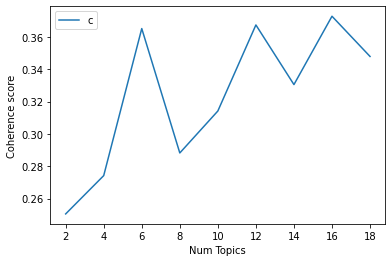

In [49]:
# Show graph
plt.plot(range(2,20,2), coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## Optimal Model


In [50]:
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

2021-07-29 12:19:35,826: INFO : topic #0 (0.062): 0.004*"vaccine" + 0.003*"sugar" + 0.003*"china" + 0.002*"drug" + 0.002*"measles" + 0.002*"vaccination" + 0.002*"harm" + 0.002*"country" + 0.002*"vaccinate" + 0.002*"asthma"
2021-07-29 12:19:35,830: INFO : topic #1 (0.062): 0.002*"donor" + 0.002*"sperm" + 0.002*"outbreak" + 0.002*"condom" + 0.002*"who" + 0.002*"cigarette" + 0.002*"weight" + 0.002*"tumour" + 0.002*"ebola" + 0.002*"pill"
2021-07-29 12:19:35,833: INFO : topic #2 (0.062): 0.004*"mesh" + 0.003*"drug" + 0.003*"cancer" + 0.002*"antibiotic" + 0.002*"mental" + 0.002*"water" + 0.002*"sun" + 0.002*"brain" + 0.002*"obesity" + 0.002*"increase"
2021-07-29 12:19:35,835: INFO : topic #3 (0.062): 0.003*"cigarette" + 0.003*"brown" + 0.003*"smoker" + 0.003*"baby" + 0.002*"gate" + 0.002*"birth" + 0.002*"smoking" + 0.002*"vaping" + 0.002*"boy" + 0.002*"harmful"
2021-07-29 12:19:35,839: INFO : topic #4 (0.062): 0.002*"diet" + 0.002*"cancer" + 0.002*"sleep" + 0.002*"box" + 0.002*"weight" + 0.0

[(0,
  '0.004*"vaccine" + 0.003*"sugar" + 0.003*"china" + 0.002*"drug" + '
  '0.002*"measles" + 0.002*"vaccination" + 0.002*"harm" + 0.002*"country" + '
  '0.002*"vaccinate" + 0.002*"asthma"'),
 (1,
  '0.002*"donor" + 0.002*"sperm" + 0.002*"outbreak" + 0.002*"condom" + '
  '0.002*"who" + 0.002*"cigarette" + 0.002*"weight" + 0.002*"tumour" + '
  '0.002*"ebola" + 0.002*"pill"'),
 (2,
  '0.004*"mesh" + 0.003*"drug" + 0.003*"cancer" + 0.002*"antibiotic" + '
  '0.002*"mental" + 0.002*"water" + 0.002*"sun" + 0.002*"brain" + '
  '0.002*"obesity" + 0.002*"increase"'),
 (3,
  '0.003*"cigarette" + 0.003*"brown" + 0.003*"smoker" + 0.003*"baby" + '
  '0.002*"gate" + 0.002*"birth" + 0.002*"smoking" + 0.002*"vaping" + '
  '0.002*"boy" + 0.002*"harmful"'),
 (4,
  '0.002*"diet" + 0.002*"cancer" + 0.002*"sleep" + 0.002*"box" + '
  '0.002*"weight" + 0.002*"fast" + 0.002*"plasma" + 0.002*"diabetes" + '
  '0.002*"sex" + 0.001*"flu"'),
 (5,
  '0.003*"cannabis" + 0.002*"child" + 0.002*"woman" + 0.002*"sleep

In [51]:
pyLDAvis.gensim_models.prepare(optimal_model, corpus, dictionary)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.074718  0.033553       1        1  55.380343
5      0.031214 -0.065367       2        1  19.876978
15     0.020858  0.005534       3        1   5.142957
6      0.015640  0.007474       4        1   4.318866
9      0.006024  0.014241       5        1   3.733058
0     -0.027399  0.029636       6        1   3.718528
13    -0.002504 -0.008027       7        1   1.701580
12    -0.003379 -0.017119       8        1   1.283739
7     -0.019351  0.005747       9        1   0.851792
1     -0.011782 -0.004307      10        1   0.838397
14    -0.024076  0.006299      11        1   0.726791
2     -0.006592  0.001196      12        1   0.641231
11    -0.003587  0.002074      13        1   0.566901
4     -0.010618 -0.002357      14        1   0.475339
3     -0.021508 -0.000079      15        1   0.391172
10    -0.017658 -0.008497      16        1   0.352328, topic_info=        Term        Freq       Total Category  logprob  loglift
368   cancer  521.000000  521.000000  Default  30.0000  30.0000
539     baby  384.000000  384.000000  Default  29.0000  29.0000
1025   woman  402.000000  402.000000  Default  28.0000  28.0000
1262   heart  223.000000  223.000000  Default  27.0000  27.0000
274     food  363.000000  363.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
1025   woman    0.854698  402.563527  Topic16  -6.6808  -0.5065
599      die    0.815622  209.909970  Topic16  -6.7276   0.0979
1604     fat    0.795760  139.287395  Topic16  -6.7523   0.4834
547    birth    0.783390  212.605033  Topic16  -6.7679   0.0448
1971     hiv    0.767521  160.012330  Topic16  -6.7884   0.3085

[985 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4027      1  0.253512  abortion
4027      2  0.056336  abortion
4027      3  0.028168  abortion
4027      4  0.112672  abortion
4027      5  0.028168  abortion
...     ...       ...       ...
3533      4  0.061031      zone
3533      5  0.244122      zone
3533      6  0.061031      zone
3533      7  0.061031      zone
3533      8  0.061031      zone

[6219 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 16, 7, 10, 1, 14, 13, 8, 2, 15, 3, 12, 5, 4, 11])

In [52]:
# Compute Perplexity
print('\nPerplexity: ', optimal_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_ldatfidf = CoherenceModel(model=optimal_model, texts=lemmatized_list, dictionary=dictionary, coherence='c_v')
coherence_ldatfidf = coherence_model_ldatfidf.get_coherence()
print('\nCoherence Score: ', coherence_ldatfidf)

2021-07-29 12:19:59,436: INFO : -9.006 per-word bound, 514.2 perplexity estimate based on a held-out corpus of 712 documents with 193333 words
2021-07-29 12:19:59,446: INFO : using WordOccurrenceAccumulator to estimate probabilities from sliding windows
2021-07-29 12:19:59,475: INFO : WordOccurrenceAccumulator accumulated stats from 1000 documents
2021-07-29 12:19:59,503: INFO : WordOccurrenceAccumulator accumulated stats from 2000 documents
2021-07-29 12:19:59,532: INFO : WordOccurrenceAccumulator accumulated stats from 3000 documents
2021-07-29 12:19:59,563: INFO : WordOccurrenceAccumulator accumulated stats from 4000 documents
2021-07-29 12:19:59,591: INFO : WordOccurrenceAccumulator accumulated stats from 5000 documents
2021-07-29 12:19:59,620: INFO : WordOccurrenceAccumulator accumulated stats from 6000 documents



Perplexity:  -9.006085590283034


2021-07-29 12:19:59,654: INFO : WordOccurrenceAccumulator accumulated stats from 7000 documents
2021-07-29 12:19:59,685: INFO : WordOccurrenceAccumulator accumulated stats from 8000 documents
2021-07-29 12:19:59,713: INFO : WordOccurrenceAccumulator accumulated stats from 9000 documents
2021-07-29 12:19:59,744: INFO : WordOccurrenceAccumulator accumulated stats from 10000 documents
2021-07-29 12:19:59,773: INFO : WordOccurrenceAccumulator accumulated stats from 11000 documents
2021-07-29 12:19:59,804: INFO : WordOccurrenceAccumulator accumulated stats from 12000 documents
2021-07-29 12:19:59,835: INFO : WordOccurrenceAccumulator accumulated stats from 13000 documents
2021-07-29 12:19:59,865: INFO : WordOccurrenceAccumulator accumulated stats from 14000 documents
2021-07-29 12:19:59,900: INFO : WordOccurrenceAccumulator accumulated stats from 15000 documents
2021-07-29 12:19:59,938: INFO : WordOccurrenceAccumulator accumulated stats from 16000 documents
2021-07-29 12:19:59,974: INFO : W


Coherence Score:  0.37272927457496563



## -----------------------Rewrite 




# Dominant topic in each sentence 

In [54]:
def format_topics_sentences(ldamodel=lda_model_tfidf, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.8584,"cancer, food, screen, baby, alcohol, woman, ch...",My name is Tim and I'm a cheese addict. But wh...
1,1,8.0,0.5027,"cancer, food, screen, baby, alcohol, woman, ch...",Children in the UK exceed the maximum recommen...
2,2,5.0,0.5108,"cannabis, child, woman, sleep, surgery, screen...",A clinical trial has been launched to see if a...
3,3,8.0,0.4157,"cancer, food, screen, baby, alcohol, woman, ch...",When 12-year-old Matthew Carter saw how much s...
4,4,8.0,0.5388,"cancer, food, screen, baby, alcohol, woman, ch...",When Jessica Share bought sperm from a sperm b...
5,5,8.0,0.8541,"cancer, food, screen, baby, alcohol, woman, ch...",Scientists have found the most likely source o...
6,6,8.0,0.3855,"cancer, food, screen, baby, alcohol, woman, ch...",A month-long campaign encouraging women to gro...
7,7,8.0,0.8744,"cancer, food, screen, baby, alcohol, woman, ch...",There is little evidence screen use for childr...
8,8,8.0,0.6039,"cancer, food, screen, baby, alcohol, woman, ch...",Authorities investigating the death of an 11-y...
9,9,8.0,0.8833,"cancer, food, screen, baby, alcohol, woman, ch...",New guidance from the Royal College of Paediat...


# Find the most representative document for each topic

In [55]:
# Group top 5 sentences under each topic
sent_topics_sorteddf= pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.8654,"vaccine, sugar, china, drug, measles, vaccinat...",Taliban flag raised above Afghan-Pakistan bord...
1,2.0,0.3909,"mesh, drug, cancer, antibiotic, mental, water,...",Italian police have arrested 34 people alleged...
2,3.0,0.3042,"cigarette, brown, smoker, baby, gate, birth, s...",Search teams deployed to rescue injured man fr...
3,5.0,0.8564,"cannabis, child, woman, sleep, surgery, screen...",The main Paris ring road was slowed to a crawl...
4,6.0,0.6433,"cancer, weight, calorie, brain, ovarian, baby,...",Popular brands of fitness trackers can overest...


## Topic distribution across documents

In [56]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,8.0,"cancer, food, screen, baby, alcohol, woman, ch...",11.0,0.0154
1.0,8.0,"cancer, food, screen, baby, alcohol, woman, ch...",NaN,NaN
2.0,5.0,"cannabis, child, woman, sleep, surgery, screen...",1.0,0.0014
3.0,8.0,"cancer, food, screen, baby, alcohol, woman, ch...",1.0,0.0014
4.0,8.0,"cancer, food, screen, baby, alcohol, woman, ch...",NaN,NaN
...,...,...,...,...
707.0,8.0,"cancer, food, screen, baby, alcohol, woman, ch...",NaN,NaN
708.0,8.0,"cancer, food, screen, baby, alcohol, woman, ch...",NaN,NaN
709.0,8.0,"cancer, food, screen, baby, alcohol, woman, ch...",NaN,NaN
710.0,8.0,"cancer, food, screen, baby, alcohol, woman, ch...",NaN,NaN


# Trigram 

In [57]:
trigram = gensim.models.Phrases(bigram[lemmatized_list], threshold=100) 
trigram_2 = gensim.models.phrases.Phraser(trigram)
trigram_words = [trigram_2[text] for text in lemmatized_list]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2021-07-29 12:22:07,661: INFO : collecting all words and their counts
2021-07-29 12:22:07,666: INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2021-07-29 12:22:09,275: INFO : collected 167610 word types from a corpus of 222821 words (unigram + bigrams) and 712 sentences
2021-07-29 12:22:09,278: INFO : using 167610 counts as vocab in Phrases<0 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2021-07-29 12:22:09,280: INFO : source_vocab length 167610
2021-07-29 12:22:11,125: INFO : Phraser built with 515 phrasegrams


In [58]:
lemmatized_texts_trigram= [[lemmatizer.lemmatize(element) for element in text] for text in trigram_words]

print(lemmatized_texts_trigram[0])

['tim', 'cheese', 'addict', 'but', 'discover', 'recently', 'shaken', 'core', 'barely', 'look', 'babybel', 'face', 'half', 'eat', 'halloumi', 'squeaklessly', 'lie', 'yellow', 'fridge', 'cheese', 'dream', 'shatter', 'for', 'lifetime', 'unfettered', 'devotion', 'possibly', 'cheese', 'foe', 'friend', 'that', 'addict', 'good', 'body', 'that', 'cheese', 'toast', 'these', 'question', 'begin', 'surface', 'couple', 'month', 'ago', 'begin', 'make', 'episode', 'new', 'podcast', 'bbc', 'all', 'hail', 'kale', 'look', 'dairy', 'scary', 'for', 'time', 'increasingly', 'question', 'logic', 'adult', 'drinking', 'milk', 'while', 'milk', 'dairy', 'product', 'cheese', 'yoghurt', 'good', 'source', 'protein', 'calcium', 'form', 'healthy', 'balance', 'diet', 'michael', 'greger', 'nutritionfacts', 'org', 'there', 'animal', 'planet', 'drink', 'milk', 'wean', 'drink', 'milk', 'specie', 'sense', 'reel', 'series', 'study', 'show', 'life', 'shorten', 'potential', 'drinking', 'hormonal', 'stew', 'blithely', 'assume'

In [59]:
# Create Dictionary
dictionary_trigram = Dictionary(lemmatized_texts_trigram)
dictionary_trigram.filter_extremes(no_below=5, no_above=0.7)

# Create Corpus
corpus_trigram = [dictionary_trigram.doc2bow(text) for text in lemmatized_texts_trigram]
print('Number of unique tokens: %d' % len(dictionary_trigram))
print('Number of documents: %d' % len(corpus_trigram))

# Term Document Frequency
corpus_trigram = [dictionary_trigram.doc2bow(text) for text in lemmatized_texts_trigram]

# View
print(corpus_trigram[:1])

2021-07-29 12:22:16,631: INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-07-29 12:22:16,852: INFO : built Dictionary(14295 unique tokens: ['able', 'abood', 'absorb', 'accord', 'actual']...) from 712 documents (total 222947 corpus positions)
2021-07-29 12:22:16,880: INFO : discarding 9941 tokens: [('abood', 1), ('babybel', 1), ('benign', 3), ('bewildering', 2), ('blithely', 1), ('brie', 1), ('butterfat', 1), ('confess', 4), ('controversially', 3), ('core', 4)]...
2021-07-29 12:22:16,882: INFO : keeping 4354 tokens which were in no less than 5 and no more than 498 (=70.0%) documents
2021-07-29 12:22:16,894: INFO : resulting dictionary: Dictionary(4354 unique tokens: ['able', 'absorb', 'accord', 'actual', 'addict']...)


Number of unique tokens: 4354
Number of documents: 712
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 2), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 3), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 21), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 10), (48, 1), (49, 1), (50, 3), (51, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 3), (62, 2), (63, 2), (64, 1), (65, 1), (66, 1), (67, 2), (68, 2), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 1), (78, 3), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 6), (89, 1), (90, 2), (91, 1), (92, 3), (93, 1), (94, 2), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (

In [61]:
[[(dictionary_trigram[id], freq) for id, freq in cp] for cp in corpus_trigram[:1]]

[[('able', 1),
  ('absorb', 1),
  ('accord', 1),
  ('actual', 1),
  ('addict', 2),
  ('addiction', 1),
  ('addictive', 1),
  ('adult', 2),
  ('ago', 1),
  ('agree', 1),
  ('all', 3),
  ('and', 1),
  ('animal', 1),
  ('answer', 1),
  ('apparently', 2),
  ('assume', 1),
  ('away', 2),
  ('bacteria', 1),
  ('balance', 1),
  ('barely', 1),
  ('bbc', 2),
  ('begin', 2),
  ('beneficial', 1),
  ('body', 1),
  ('bother', 1),
  ('bread', 1),
  ('break', 2),
  ('but', 3),
  ('calcium', 1),
  ('carry', 1),
  ('centre', 1),
  ('certainly', 1),
  ('change', 1),
  ('cheese', 21),
  ('chemical', 1),
  ('childhood', 1),
  ('combination', 1),
  ('concentrate', 1),
  ('confirm', 1),
  ('consensus', 2),
  ('consider', 1),
  ('consume', 1),
  ('contact', 1),
  ('contain', 1),
  ('couple', 1),
  ('crack', 1),
  ('daily', 1),
  ('dairy', 10),
  ('damage', 1),
  ('david', 1),
  ('day', 3),
  ('decide', 1),
  ('definitive', 1),
  ('denial', 1),
  ('diagnosis', 1),
  ('diet', 2),
  ('digest', 1),
  ('dinner', 

In [62]:
tfidf_trigram =  gensim.models.TfidfModel(corpus_trigram)
corpus_tfidf_trigram = tfidf_trigram[corpus_trigram]
for i in corpus_tfidf_trigram[0]:
  print(i)

2021-07-29 12:25:49,039: INFO : collecting document frequencies
2021-07-29 12:25:49,045: INFO : PROGRESS: processing document #0
2021-07-29 12:25:49,075: INFO : calculating IDF weights for 712 documents and 4353 features (119484 matrix non-zeros)


(0, 0.010733510947880718)
(1, 0.03388257138072638)
(2, 0.010648432044640985)
(3, 0.030838201709951035)
(4, 0.07510986578458728)
(5, 0.029441925071321724)
(6, 0.03646999553241044)
(7, 0.02814155005810355)
(8, 0.015100627696457944)
(9, 0.021912019689559803)
(10, 0.05989406129841791)
(11, 0.007758929940893467)
(12, 0.024956389360335157)
(13, 0.022996957049443004)
(14, 0.07102602591801245)
(15, 0.030345629020902622)
(16, 0.029911070502382377)
(17, 0.027543813512019212)
(18, 0.024478312591312043)
(19, 0.031923139069834225)
(20, 0.02726296192765338)
(21, 0.02574753492904247)
(22, 0.03252526345477822)
(23, 0.009505515475892175)
(24, 0.035513012959006225)
(25, 0.03317560733447863)
(26, 0.04191007423231117)
(27, 0.011021975652016645)
(28, 0.03755493289229364)
(29, 0.012493264980120168)
(30, 0.01746246931239391)
(31, 0.026586830938614994)
(32, 0.0076411748215124455)
(33, 0.7886535907381663)
(34, 0.025464364823700666)
(35, 0.02471383519844321)
(36, 0.024478312591312043)
(37, 0.03317560733447863)


In [63]:
lda_model_trigram = gensim.models.LdaMulticore(corpus_tfidf_trigram, num_topics=6, id2word=dictionary_trigram, workers=2, passes=2, iterations = 100)

2021-07-29 12:26:49,764: INFO : using symmetric alpha at 0.16666666666666666
2021-07-29 12:26:49,768: INFO : using symmetric eta at 0.16666666666666666
2021-07-29 12:26:49,773: INFO : using serial LDA version on this node
2021-07-29 12:26:49,782: INFO : running online LDA training, 6 topics, 2 passes over the supplied corpus of 712 documents, updating every 4000 documents, evaluating every ~712 documents, iterating 100x with a convergence threshold of 0.001000
2021-07-29 12:26:49,785: WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-07-29 12:26:49,789: INFO : training LDA model using 2 processes
2021-07-29 12:26:50,428: INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #712/712, outstanding queue size 1
2021-07-29 12:26:52,246: INFO : topic #3 (0.167): 0.002*"cancer" + 0.002*"woman" + 0.001*"brain" + 0.001*"screen" + 0.001*"child" + 0.001*"breast_cancer" + 0.001*"measles" + 0.001*"study"

In [64]:
pprint(lda_model_trigram.print_topics())

2021-07-29 12:26:56,007: INFO : topic #0 (0.167): 0.001*"donor" + 0.001*"woman" + 0.001*"brain" + 0.001*"baby" + 0.001*"procedure" + 0.001*"child" + 0.001*"injury" + 0.001*"tumour" + 0.001*"service" + 0.001*"surgery"
2021-07-29 12:26:56,010: INFO : topic #1 (0.167): 0.003*"cancer" + 0.002*"woman" + 0.002*"child" + 0.002*"patient" + 0.001*"surgery" + 0.001*"meat" + 0.001*"air_pollution" + 0.001*"vegan" + 0.001*"baby" + 0.001*"malaria"
2021-07-29 12:26:56,013: INFO : topic #2 (0.167): 0.002*"baby" + 0.002*"drug" + 0.002*"cannabis" + 0.002*"boy" + 0.002*"patient" + 0.002*"child" + 0.001*"brain" + 0.001*"bacteria" + 0.001*"mental" + 0.001*"dementia"
2021-07-29 12:26:56,015: INFO : topic #3 (0.167): 0.002*"cancer" + 0.002*"woman" + 0.002*"screen" + 0.002*"alcohol" + 0.002*"breast_cancer" + 0.002*"child" + 0.001*"drinking" + 0.001*"sleep" + 0.001*"brain" + 0.001*"study"
2021-07-29 12:26:56,018: INFO : topic #4 (0.167): 0.002*"sex" + 0.002*"woman" + 0.002*"hpv" + 0.002*"drug" + 0.002*"child" 

[(0,
  '0.001*"donor" + 0.001*"woman" + 0.001*"brain" + 0.001*"baby" + '
  '0.001*"procedure" + 0.001*"child" + 0.001*"injury" + 0.001*"tumour" + '
  '0.001*"service" + 0.001*"surgery"'),
 (1,
  '0.003*"cancer" + 0.002*"woman" + 0.002*"child" + 0.002*"patient" + '
  '0.001*"surgery" + 0.001*"meat" + 0.001*"air_pollution" + 0.001*"vegan" + '
  '0.001*"baby" + 0.001*"malaria"'),
 (2,
  '0.002*"baby" + 0.002*"drug" + 0.002*"cannabis" + 0.002*"boy" + '
  '0.002*"patient" + 0.002*"child" + 0.001*"brain" + 0.001*"bacteria" + '
  '0.001*"mental" + 0.001*"dementia"'),
 (3,
  '0.002*"cancer" + 0.002*"woman" + 0.002*"screen" + 0.002*"alcohol" + '
  '0.002*"breast_cancer" + 0.002*"child" + 0.001*"drinking" + 0.001*"sleep" + '
  '0.001*"brain" + 0.001*"study"'),
 (4,
  '0.002*"sex" + 0.002*"woman" + 0.002*"hpv" + 0.002*"drug" + 0.002*"child" + '
  '0.002*"nh" + 0.001*"test" + 0.001*"eat" + 0.001*"food" + 0.001*"men"'),
 (5,
  '0.002*"hiv" + 0.002*"cancer" + 0.002*"vaccine" + 0.002*"child" + '
  '0

In [65]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_trigram.log_perplexity(corpus_trigram))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_tri = CoherenceModel(model=lda_model_trigram, texts=lemmatized_texts_trigram, dictionary=dictionary_trigram, coherence='c_v')
coherence_lda_tri = coherence_model_lda_tri.get_coherence()
print('\nCoherence Score: ', coherence_lda_tri)

2021-07-29 12:27:02,120: INFO : -8.636 per-word bound, 397.9 perplexity estimate based on a held-out corpus of 712 documents with 186890 words
2021-07-29 12:27:02,128: INFO : using WordOccurrenceAccumulator to estimate probabilities from sliding windows
2021-07-29 12:27:02,154: INFO : WordOccurrenceAccumulator accumulated stats from 1000 documents
2021-07-29 12:27:02,175: INFO : WordOccurrenceAccumulator accumulated stats from 2000 documents
2021-07-29 12:27:02,199: INFO : WordOccurrenceAccumulator accumulated stats from 3000 documents
2021-07-29 12:27:02,226: INFO : WordOccurrenceAccumulator accumulated stats from 4000 documents
2021-07-29 12:27:02,255: INFO : WordOccurrenceAccumulator accumulated stats from 5000 documents
2021-07-29 12:27:02,282: INFO : WordOccurrenceAccumulator accumulated stats from 6000 documents
2021-07-29 12:27:02,305: INFO : WordOccurrenceAccumulator accumulated stats from 7000 documents



Perplexity:  -8.636421748756424


2021-07-29 12:27:02,328: INFO : WordOccurrenceAccumulator accumulated stats from 8000 documents
2021-07-29 12:27:02,361: INFO : WordOccurrenceAccumulator accumulated stats from 9000 documents
2021-07-29 12:27:02,387: INFO : WordOccurrenceAccumulator accumulated stats from 10000 documents
2021-07-29 12:27:02,408: INFO : WordOccurrenceAccumulator accumulated stats from 11000 documents
2021-07-29 12:27:02,439: INFO : WordOccurrenceAccumulator accumulated stats from 12000 documents
2021-07-29 12:27:02,463: INFO : WordOccurrenceAccumulator accumulated stats from 13000 documents
2021-07-29 12:27:02,490: INFO : WordOccurrenceAccumulator accumulated stats from 14000 documents
2021-07-29 12:27:02,516: INFO : WordOccurrenceAccumulator accumulated stats from 15000 documents
2021-07-29 12:27:02,543: INFO : WordOccurrenceAccumulator accumulated stats from 16000 documents
2021-07-29 12:27:02,567: INFO : WordOccurrenceAccumulator accumulated stats from 17000 documents
2021-07-29 12:27:02,593: INFO : 


Coherence Score:  0.26765990940608814


In [66]:
pyLDAvis.gensim_models.prepare(lda_model_trigram, corpus_trigram, dictionary_trigram)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.017992  0.007599       1        1  24.246658
1     -0.006354 -0.015677       2        1  22.914849
4     -0.019928  0.008135       3        1  20.406241
3     -0.000182  0.018003       4        1  14.356196
2      0.013079 -0.008716       5        1  13.876006
0     -0.004608 -0.009344       6        1   4.200050, topic_info=          Term        Freq       Total Category  logprob  loglift
3055  cannabis  124.000000  124.000000  Default  30.0000  30.0000
598      donor  113.000000  113.000000  Default  29.0000  29.0000
550      brain  185.000000  185.000000  Default  28.0000  28.0000
1920    tumour   87.000000   87.000000  Default  27.0000  27.0000
1028       boy  121.000000  121.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
640       girl    6.931439  113.953413   Topic6  -7.0321   0.3704
715        men    7.474236  177.353744   Topic6  -6.9567   0.0034
362     cancer    8.413764  361.043796   Topic6  -6.8383  -0.5891
1395      drug    7.673647  241.441956   Topic6  -6.9304  -0.2788
413    patient    7.419033  248.519358   Topic6  -6.9642  -0.3414

[420 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4189      1  0.046233  abortion
4189      2  0.254279  abortion
4189      3  0.450767  abortion
4189      4  0.150256  abortion
4189      5  0.092465  abortion
...     ...       ...       ...
867       2  0.175919     young
867       3  0.255367     young
867       4  0.124846     young
867       5  0.119171     young
867       6  0.017024     young

[1836 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 5, 4, 3, 1])